<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

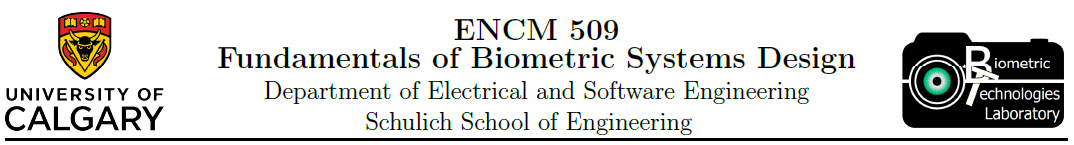

<center>
    <h1>Laboratory Experiment #4</h1>
    <h3>Fingerprint Biometrics - Part I: Preprocessing and Feature Extraction</h3>
</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import ndimage as ndi

from skimage.io import imread
from skimage.filters import gabor_kernel
from skimage.util import invert
from skimage.exposure import equalize_adapthist

# custom functions
from utils.blockproc import blockproc

#### Some auxiliary functitons

In [2]:
def gabor_filtering(img, fi):
    # 'mode' specifies how the convolution algorithm will deal with the borders
    If1 = equalize_adapthist(ndi.convolve(img, fi, mode='wrap'))
    # normalize
    If1 = ((If1 - np.min(If1)) / (np.max(If1) - np.min(If1))) * 255
    #print(np.min(If1), np.max(If1))
    
    return If1

# create the filter according to the size of the image
def gabor_template(im, angle, freq=0.11):
    r, c = im.shape
    ysize = int(np.floor(r/10))

    t = int(np.floor(ysize/8))
    fi = np.real(gabor_kernel(freq, theta=angle, n_stds=t))
    
    return fi

## Reading image

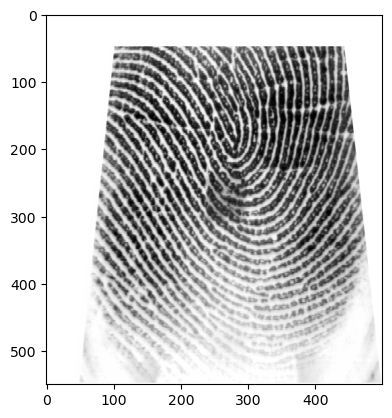

In [3]:
# the image loaded is already [0,1]
img = imread('BTLab_Fingerprints/right_thumb/1.bmp', as_gray=True)
plt.imshow(img, cmap='gray');

### Plotting the filters

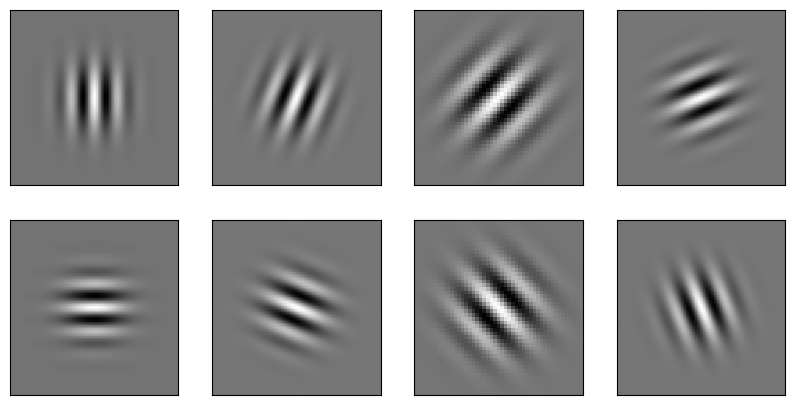

In [4]:
# +0.1 because python discart the last value
angle = np.arange(0, np.pi-np.pi/8+0.1, np.pi/8)
# filter size: x, y
xsize = 32; ysize = 32
# standard deviation of the gaussian envelope
dx = 8; dy = 8
# frequency
fq = 0.11

plt.figure(figsize=(10,5))

# filtering and feature extraction
for i,a in enumerate(angle):
    # build the filter
    gabor = np.real(gabor_kernel(fq, theta=a, sigma_x=dx, sigma_y=dy, n_stds=4))
    
    # show Gabor filters
    plt.subplot(2, 4, i+1)
    plt.imshow(gabor, cmap='gray', aspect='auto')
    plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

#### 3D representation of the filter

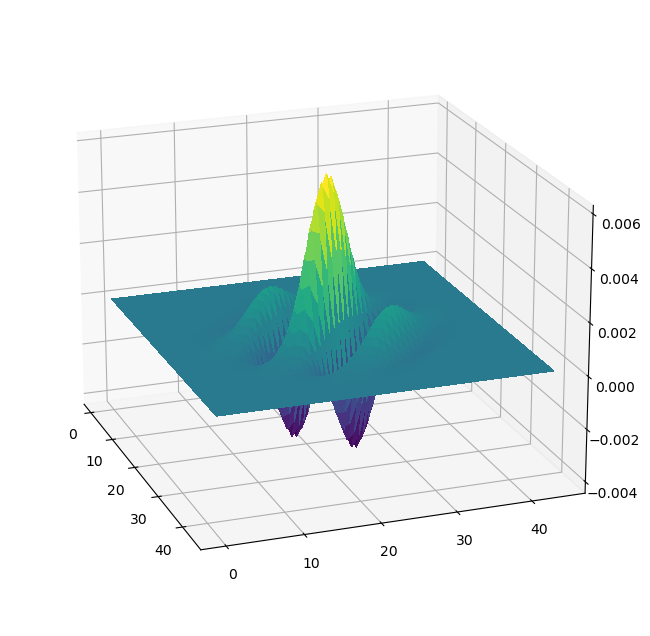

In [5]:
fi = gabor_template(img, angle=np.pi/4)

# Filter as a 3D function
fi_r, fi_c = fi.shape

X = np.arange(0, fi_c)
Y = np.arange(0, fi_r)
X, Y = np.meshgrid(X, Y)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, fi, cmap=cm.viridis,
                       linewidth=0, antialiased=False)
ax.view_init(elev=20, azim=-20)

## Gabor Filtering

### Filtering with Gabor filter in $\pi/4$ degrees

In [6]:
img_f = gabor_filtering(img, fi)

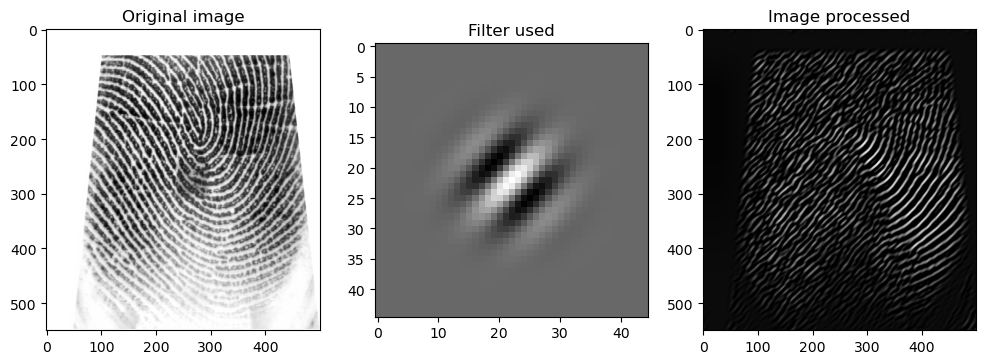

In [7]:
plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray'); plt.title('Original image')
plt.subplot(1,3,2)
plt.imshow(fi, cmap='gray'); plt.title('Filter used')
plt.subplot(1,3,3)
plt.imshow(img_f, cmap='gray'); plt.title('Image processed');

### Filtering with Gabor filter in $-\pi/4$ degrees

In [8]:
fi = gabor_template(img, angle=-np.pi/4)
img_f = gabor_filtering(img, fi)

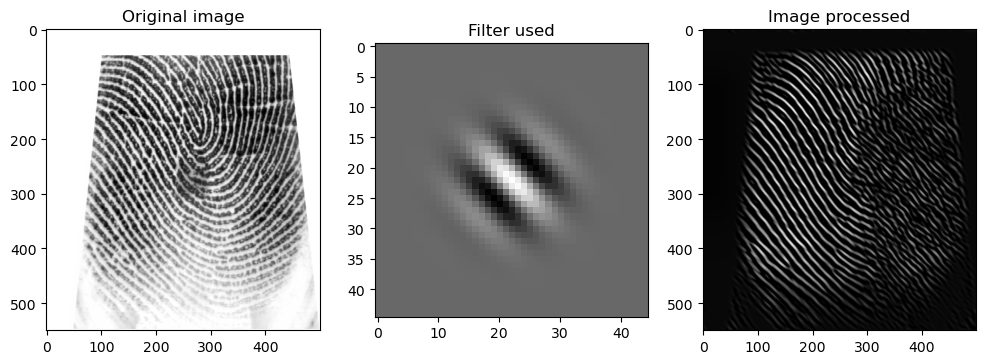

In [9]:
plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray'); plt.title('Original image')
plt.subplot(1,3,2)
plt.imshow(fi, cmap='gray'); plt.title('Filter used')
plt.subplot(1,3,3)
plt.imshow(img_f, cmap='gray'); plt.title('Image processed');

### Filtering with Gabor filter in $\pi$ degrees

In [10]:
fi2 = gabor_template(img, angle=np.pi)
img_f = gabor_filtering(img, fi2)

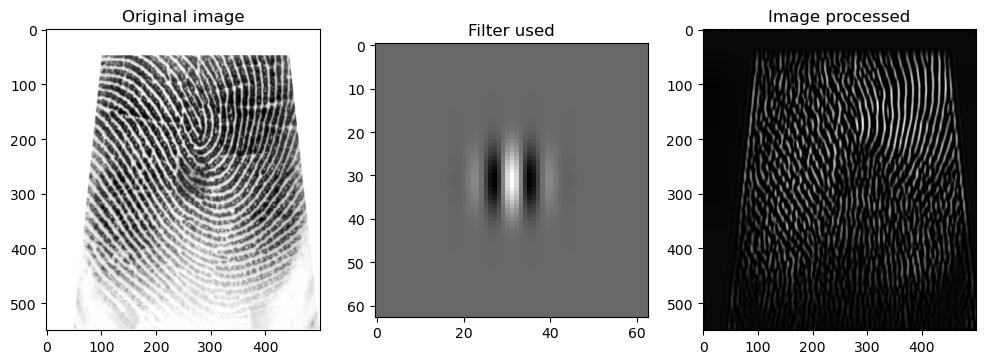

In [11]:
plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray'); plt.title('Original image')
plt.subplot(1,3,2)
plt.imshow(fi2, cmap='gray'); plt.title('Filter used')
plt.subplot(1,3,3)
plt.imshow(img_f, cmap='gray'); plt.title('Image processed');